In [7]:
import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

filename = "random"
id = 0
path = "./parquet_files/"

# Read the binary file
df = pl.read_parquet(f"{path}{filename}_{id}_SOM.parquet")

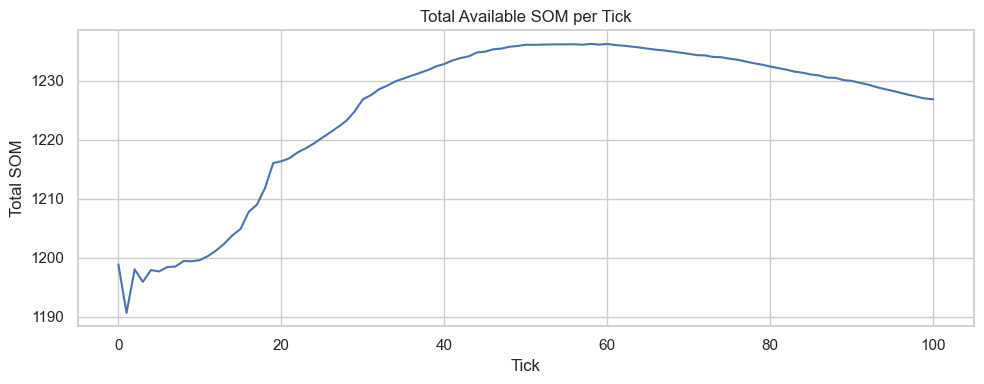

In [8]:
# Group by tick and sum SOM
som_per_tick = df.group_by(['tick']).agg(pl.col('som_value').sum().alias("total_som"))

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))
sns.lineplot(data=som_per_tick, x='tick', y='total_som')
plt.title("Total Available SOM per Tick")
plt.xlabel("Tick")
plt.ylabel("Total SOM")
plt.tight_layout()
plt.show()

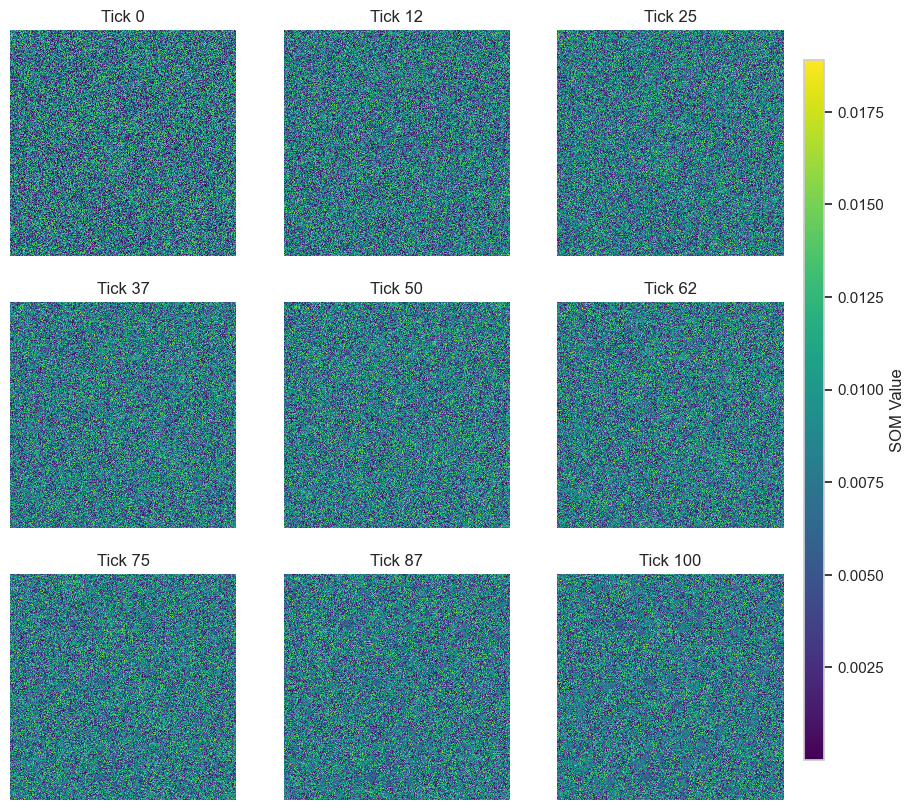

In [9]:
# Get the unique ticks (timesteps) in sorted order
unique_ticks = sorted(df['tick'].unique())

# Calculate the step size to pick 25 evenly spaced ticks
ticks_to_plot = np.linspace(0, len(unique_ticks)-1, 9, dtype=int)

# Prepare the grid (400x400)
grid_size = 400

# Create a 5x5 grid for 25 timesteps
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

cmap = "viridis"

# Loop through the subplots and plot each heatmap
for idx, ax in enumerate(axes.flatten()):
    tick = unique_ticks[ticks_to_plot[idx]]  # Select tick based on the evenly spaced indices
    # Prepare the grid for the specific tick
    grid = np.zeros((grid_size, grid_size))
    
    # Filter data for the specific tick
    tick_data = df.filter(pl.col('tick') == tick)
    
    x_vals = tick_data["x"].to_numpy()
    y_vals = tick_data["y"].to_numpy()
    som_vals = tick_data["som_value"].to_numpy()
    
    grid[x_vals, y_vals] = som_vals
    
    # Plot the heatmap for the selected tick
    sns.heatmap(grid, ax=ax, cmap=cmap, cbar=False, square=True, vmin=df['som_value'].min(), vmax=df['som_value'].max())
    ax.set_title(f"Tick {tick}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Add the colorbar manually to the figure (outside the grid)
# First, plot a heatmap on the whole figure to get the color range
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=df['som_value'].min(), vmax=df['som_value'].max()))
sm.set_array([])  # Empty array for ScalarMappable

# Position and add the colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust colorbar position and size as needed
fig.colorbar(sm, cax=cbar_ax, label='SOM Value')

# Adjust layout to avoid overlap
plt.show()